Abid Ali
Github: https://github.com/abid-2362
Twitter: @abidalifsd

# Exploratory Data Analysis

### Important Steps

Three important steps to keep in mind
1. Understand the data
2. Clean the data
3. Find a relationship between data

## Exploring Data

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use({'figure.facecolor':'white'})

In [150]:
ks = sns.load_dataset('titanic')

In [151]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [152]:
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [153]:
ks.shape

(891, 15)

In [154]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
# Exploring data by using unique method to explore unique values in a DataFrame
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [156]:
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [157]:
ks['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [158]:
type(ks['age'])

pandas.core.series.Series

In [159]:
test = [ks['survived'],ks['class'],ks['who'], ks['embarked']]

In [160]:
# assignment:
# get unique values from more than 1 columns

# Solution to the assignment
# pd.concat, is doing nothing, instead, returning a panda's Series DataType(pandas.core.series.Series) from this list
# so we can use panda's Series method(pandas.core.series.Series.unique) on it.
# https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html#
pd.concat([ks['survived'],ks['class'],ks['who'], ks['embarked']]).unique()

array([0, 1, 'Third', 'First', 'Second', 'man', 'woman', 'child', 'S',
       'C', 'Q', nan], dtype=object)

In [161]:
std_of_age = ks['age'].std()
std_of_age

14.526497332334042

## Cleaning and Filtering the data

In [162]:
# find missing values
ks.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [163]:
# finding total null values summary
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [164]:
# Dropping column with more null values
df = ks.copy()
ks_clean = df.drop(columns=['deck'])
ks_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [165]:
ks_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [166]:
891 - 177 - 2

712

In [167]:
ks.loc[ks['deck'] == np.nan]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [168]:
ks_clean['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [169]:
# filtering data
ks_clean.loc[ks_clean['embarked'].isnull()][['embarked', 'embark_town']]

,embarked,embark_town
61,NaN,NaN
829,NaN,NaN


In [170]:
ks_clean.shape

(891, 14)

In [171]:
ks_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [172]:
ks_clean.dropna(inplace=True)

In [173]:
ks_clean.shape

(712, 14)

In [174]:
ks_clean['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [175]:
ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [176]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## How to check outliers visually

In [178]:
ks_clean['age'].mean()

29.64209269662921

In [179]:
ks_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:ylabel='age'>

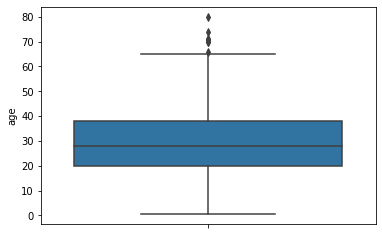

In [180]:
sns.boxplot(y="age", data=ks_clean)

above figures shows that the value above 68 is creating outliers, so lets remove those records having age more than 68

<AxesSubplot:xlabel='age', ylabel='Count'>

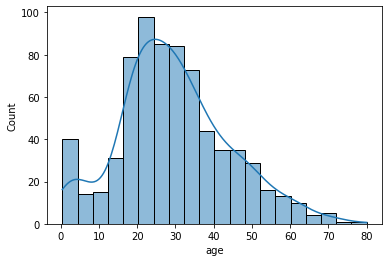

In [181]:
sns.histplot(ks_clean['age'], kde=True)

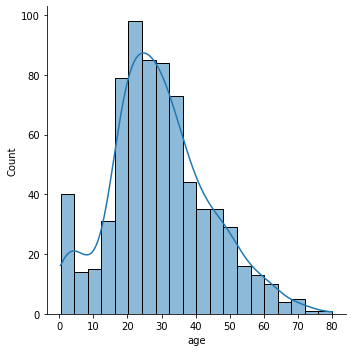

In [182]:
sns.displot(ks_clean['age'], kde=True)

In [183]:
ks_clean = ks_clean.loc[ks_clean['age']<68]

In [184]:
ks_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [185]:
ks_clean['age'].mean()

29.21797163120567

<AxesSubplot:>

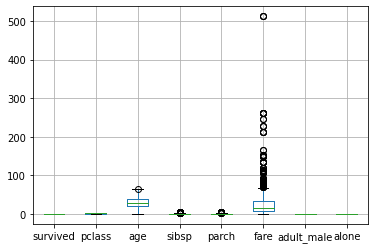

In [186]:
ks_clean.boxplot()

In [187]:
ks_clean = ks_clean.loc[ks_clean['fare'] < 300]

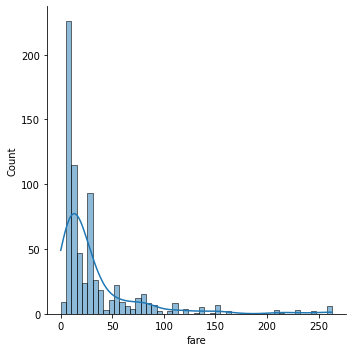

In [188]:
sns.displot(ks_clean['fare'], kde=True)

Here we can see the data is not in ideal format.
This problem needs the `Normalization` of data. Which we will see later.

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

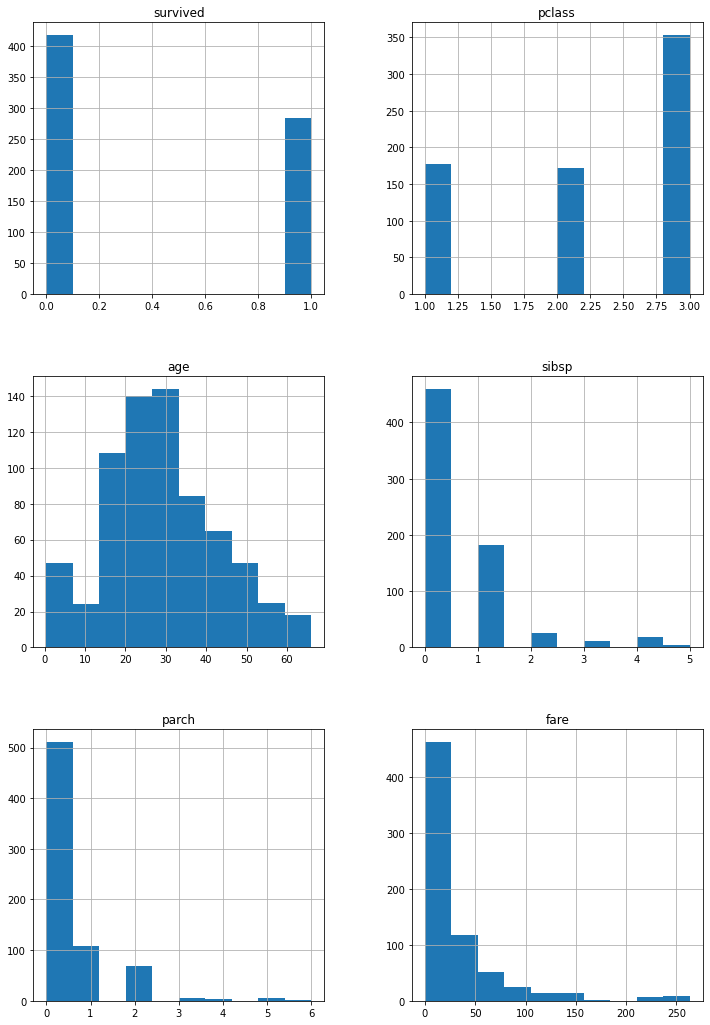

In [189]:
ks_clean.hist(figsize=(12.0, 18.0))

<AxesSubplot:>

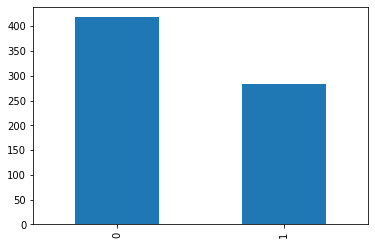

In [190]:
pd.value_counts(ks_clean['survived']).plot.bar()

Text(0.5, 0, 'Gender, Class')

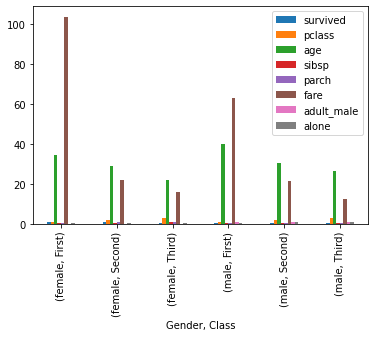

In [191]:
ks_clean.groupby(['sex', 'class']).mean().plot.bar()
plt.xlabel('Gender, Class')

## Correlation
a mutual relationship or connection between two or more things.
- "research showed a clear correlation between recession and levels of property crime"

In [192]:
corr_ks_clean = ks_clean.corr()

<AxesSubplot:>

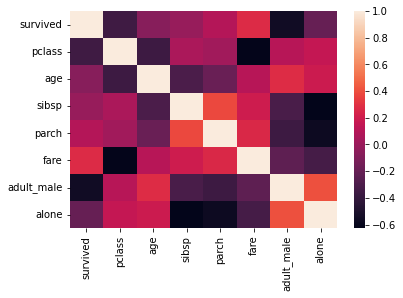

In [193]:
sns.heatmap(corr_ks_clean)

<AxesSubplot:>

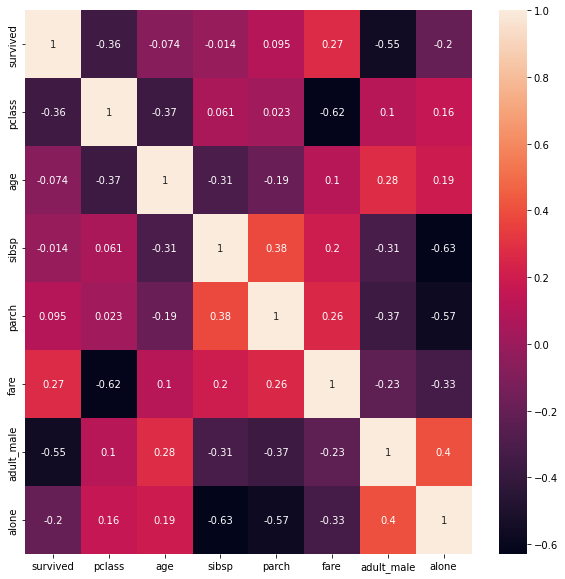

In [194]:
plt.figure(figsize=(10.0, 10.0))
sns.heatmap(data=corr_ks_clean, annot=True)

In [195]:
help(sns.heatmap)


Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

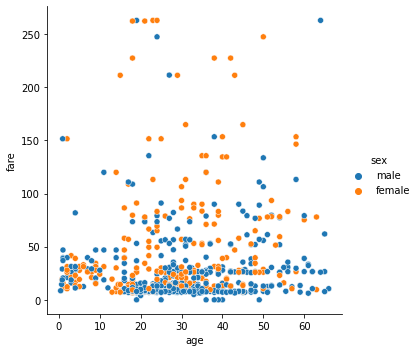

In [196]:
sns.relplot(x='age', y='fare', hue='sex', data=ks_clean)

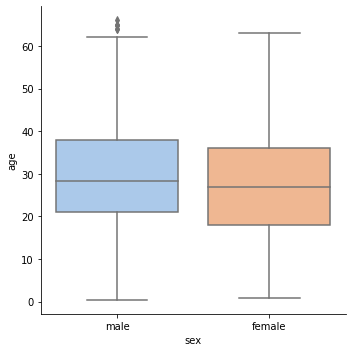

In [197]:
sns.catplot(x='sex', y='age', data=ks_clean, kind='box', palette='pastel')

In [198]:
# log transformation
ks_clean['fare_log'] = np.log(ks_clean['fare'])
ks_clean[['fare', 'fare_log']].head()

C:\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\AppData\Local\Temp\ipykernel_13432\2123111376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_clean['fare_log'] = np.log(ks_clean['fare'])


,fare,fare_log
0,7.2500,1.981001
1,71.2833,4.266662
2,7.9250,2.070022
3,53.1000,3.972177
4,8.0500,2.085672


<AxesSubplot:ylabel='fare_log'>

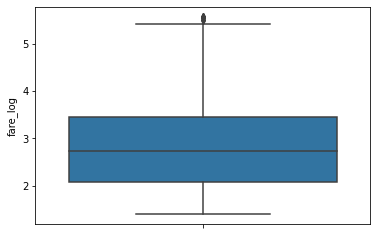

In [199]:
sns.boxplot(data=ks_clean, y='fare_log')

<AxesSubplot:ylabel='fare'>

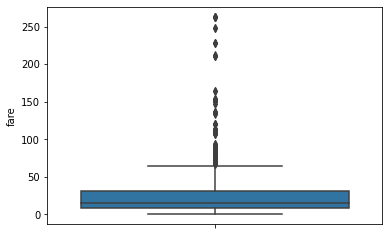

In [200]:
sns.boxplot(data=ks_clean, y='fare')

<AxesSubplot:xlabel='sex', ylabel='age'>

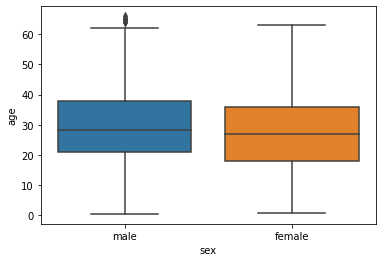

In [201]:
sns.boxplot(data=ks_clean, x='sex', y='age')

<AxesSubplot:xlabel='sex', ylabel='fare_log'>

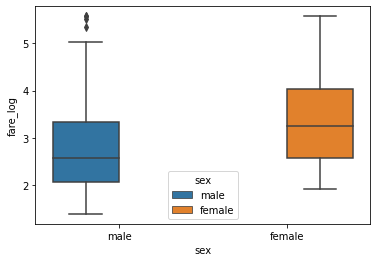

In [202]:
sns.boxplot(data=ks_clean, x='sex', y='fare_log', hue='sex')

<AxesSubplot:xlabel='sex', ylabel='fare'>

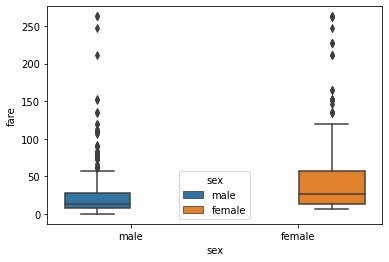

In [203]:
sns.boxplot(data=ks_clean, x='sex', y='fare', hue='sex')

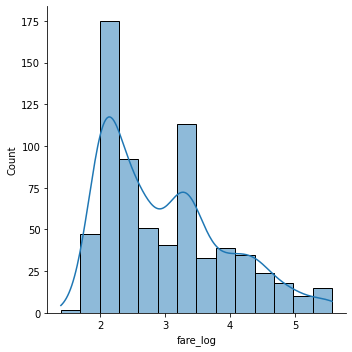

In [204]:
sns.displot(ks_clean['fare_log'], kde=True)

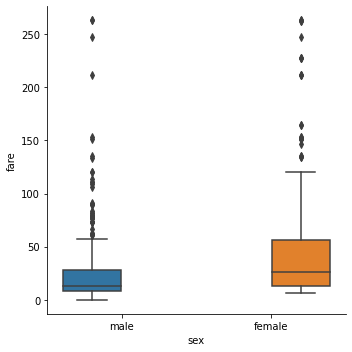

In [207]:
sns.catplot(x='sex', y='fare', hue='sex', data=ks_clean, kind='box')

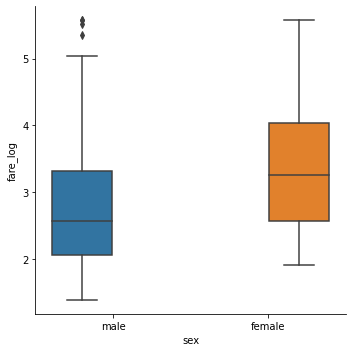

In [205]:
sns.catplot(x='sex', y='fare_log', hue='sex', data=ks_clean, kind='box')

In [206]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare,fare_log
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.404558,2.250712,29.191838,0.519943,0.435897,32.569390,-inf
std,0.491156,0.832536,13.941519,0.935297,0.858469,43.087326,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-inf
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,2.085672
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000,2.740840
75%,1.000000,3.000000,38.000000,1.000000,1.000000,31.387500,3.446410
max,1.000000,3.000000,66.000000,5.000000,6.000000,263.000000,5.572154
